In [1]:
import pandas as pd
import numpy as np
import requests
import json
from bs4 import BeautifulSoup
from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
response.status_code


400

In [4]:
#You have to use your API key to access the data!

MY_API_KEY = "spI_MF4tFqCx65dND029p6P19aN3Zwd3qYHDMsYrUaFa-55FroI4jdwMAtublbzcNSxR90mq29tDkMQQOZEvqmeVF6wRP8U8uVrVSzRiQLfo3hI87YWE9ht0t7kyX3Yx" # replace this with your API key!
client = Client(MY_API_KEY)


API_HOST = 'https://api.yelp.com/reviews'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'

url = 'https://api.yelp.com/v3/businesses/search'

params = {'term':'Restaurants', 
          'location': 'Westchester, NY',}

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

req = requests.get(url, params = params, headers = headers)

#shows its connecting
print('The status code is {}'.format(req.status_code))

#Print the data 

#json.loads(req.text)

The status code is 200


In [5]:
#clean and format the data 
resturants = req.text
resturants = json.loads(resturants)

In [6]:
# cleaning and exploring the data
for key in resturants.keys():
    print(key)

businesses
total
region


In [7]:
#turn each busines into a dataframe 
resturants_df = pd.DataFrame.from_dict(resturants['businesses'])
#resturants_df

In [8]:
resturants_df.drop(['id','alias','image_url','is_closed','url', 'coordinates','transactions','phone','distance'], axis = 1, inplace = True)


In [9]:
#Visualize the data

import matplotlib.pyplot as plt

%matplotlib inline

In [15]:


Y = resturants_df.groupby(['name']).review_count.mean()

#i think the second value is always the index of the other one but need to check 
X = Y.index



In [16]:
ax.plot(X, Y);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

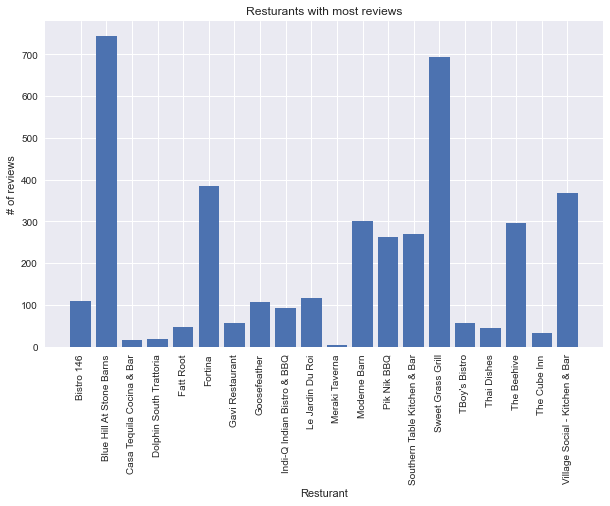

In [17]:
figure, ax = plt.subplots(figsize = (10,6))

ax.bar(X,Y)

ax.set_title('Resturants with most reviews')
ax.set_xlabel('Resturant')
ax.set_ylabel('# of reviews')
plt.xticks(rotation=90)